In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, contingency
from statannotations.Annotator import Annotator
import matplotlib.patches as mpatches
from matplotlib.colors import to_rgba

In [2]:
ids_dictionary = {
    1: "Anticommensal Effect on\n Human Gut Microbiota",
    2: "Blood–brain-barrier penetration",
    3: "Oral Bioavailability",
    4: "AMES Mutagenecity",
    5: "Metabolic Stability",
    6: "Rat Acute LD50",
    7: "Drug-Induced Liver Inhibition",
    8: "HERG Cardiotoxicity",
    9: "Haemolytic Toxicity",
    10: "Myelotoxicity",
    11: "Urinary Toxicity",
    12: "Human Intestinal Absorption",
    13: "Hepatic Steatosis",
    14: "Breast Cancer Resistance Protein Inhibition",
    15: "Drug-Induced Choleostasis",
    16: "Human multidrug and toxin extrusion Inhibition",
    17: "Toxic Myopathy",
    18: "Phospholipidosis",
    19: "Human Bile Salt Export Pump Inhibition",
    20: "Organic anion transporting\n polypeptide 1B1 binding",
    21: "Organic anion transporting\n polypeptide 1B3 binding",
    22: "Organic anion transporting\n polypeptide 2B1 binding",
    23: "Phototoxicity human",
    24: "Phototoxicity in vitro",
    25: "Respiratory Toxicity",
    26: "P-glycoprotein Inhibition",
    27: "P-glycoprotein Substrate",
    28: "Mitochondrial Toxicity",
    29: "Carcinogenecity",
    30: "DMSO Solubility",
    31: "Human Liver Microsomal Stability",
    32: "Human Plasma Protein Binding",
    33: "hERG Liability",
    34: "Organic Cation\n Transporter 2 Inhibition",
    35: "Drug-induced Ototoxicity",
    36: "Rhabdomyolysis",
    37: "T1/2 Human",
    38: "T1/2 Mouse",
    39: "T1/2 Rat",
    40: "Cytotoxicity HepG2",  # "cell line",
    41: "Cytotoxicity NIH 3T3",  # "cell line",
    42: "Cytotoxicity HEK 293",  # "cell line",
    43: "Cytotoxicity CRL-7250",  # "cell line",
    44: "Cytotoxicity HaCat",  # "cell line",
    45: "CYP450 1A2 Inhibition",
    46: "CYP450 2C19 Inhibition",
    47: "CYP450 2C9 Inhibition",
    48: "CYP450 2D6 Inhibition",
    49: "CYP450 3A4 Inhibition",
    50: "pKa dissociation constant",
    51: "logD Distribution \ncoefficient (pH 7.4)",
    52: "logS",
    53: "Drug affinity to human serum albumin",
    54: "MDCK permeability",
    55: "50% hemolytic dose",
    56: "Skin penetration",
    57: "CYP450 2C8 Inhibition",
    58: "Aqueous Solubility",  # "(in phosphate saline buffer)",
}

In [3]:
coconut_folder = "/home/ec2-user/np-clinical-trials/fpadmet_results/COCONUT"
dds_folder = "/home/ec2-user/np-clinical-trials/fpadmet_results/DDS"

In [4]:
def process_data(input_folder, threshold=0.5):
    """
    While the confidence provides a measure of how likely a prediction is compared to all other possible classifications, the credibility measure (equal to the highest p-value of any one of the possible classifications being the true label) provides an indication of how good the training set is for classifying the given example.
    """
    results_list, names_list = [], []
    batch_dictionary = {}
    for files in os.listdir(input_folder):
        if not files.endswith(".txt") or not files.endswith("predicted.txt"):
            continue
        toxicity_name = ids_dictionary[int(files.split("_")[1].split(".")[0])]
        try:
            opened_data = pd.read_csv(
                os.path.join(input_folder, files), delim_whitespace=True
            )
            opened_data = opened_data[opened_data["Credibility"] > threshold][
                "Predicted"
            ]
            if toxicity_name in batch_dictionary:
                batch_dictionary[toxicity_name] = pd.concat(
                    [batch_dictionary[toxicity_name], opened_data], axis=0
                )
            else:
                batch_dictionary[toxicity_name] = opened_data
        except Exception as e:
            print(f"Failed to process {files} with error {e}")
            continue

    for key in batch_dictionary:
        results_list.append(batch_dictionary[key])
        names_list.append(key)
    all_metrics = pd.concat(results_list, axis=1)
    all_metrics.columns = names_list
    return all_metrics, names_list

In [5]:
coconut_data, coconut_columns = process_data(coconut_folder, threshold=0.5)

Failed to process 000_50_predicted.txt with error 'Credibility'
Failed to process 000_53_predicted.txt with error 'Credibility'
Failed to process 000_54_predicted.txt with error 'Credibility'
Failed to process 000_55_predicted.txt with error 'Credibility'
Failed to process 000_51_predicted.txt with error 'Credibility'
Failed to process 000_52_predicted.txt with error 'Credibility'
Failed to process 000_56_predicted.txt with error 'Credibility'
Failed to process 001_50_predicted.txt with error 'Credibility'
Failed to process 001_53_predicted.txt with error 'Credibility'
Failed to process 001_54_predicted.txt with error 'Credibility'
Failed to process 001_55_predicted.txt with error 'Credibility'
Failed to process 001_52_predicted.txt with error 'Credibility'
Failed to process 001_51_predicted.txt with error 'Credibility'
Failed to process 001_56_predicted.txt with error 'Credibility'
Failed to process 002_50_predicted.txt with error 'Credibility'
Failed to process 002_54_predicted.txt w

In [6]:
synthethic_data, synthetic_columns = process_data(dds_folder, threshold=0.5)

Failed to process 000_50_predicted.txt with error 'Credibility'
Failed to process 000_51_predicted.txt with error 'Credibility'
Failed to process 000_52_predicted.txt with error 'Credibility'
Failed to process 000_53_predicted.txt with error 'Credibility'
Failed to process 000_54_predicted.txt with error 'Credibility'
Failed to process 000_55_predicted.txt with error 'Credibility'
Failed to process 000_56_predicted.txt with error 'Credibility'
Failed to process 001_50_predicted.txt with error 'Credibility'
Failed to process 001_51_predicted.txt with error 'Credibility'
Failed to process 001_52_predicted.txt with error 'Credibility'
Failed to process 001_53_predicted.txt with error 'Credibility'
Failed to process 001_54_predicted.txt with error 'Credibility'
Failed to process 001_55_predicted.txt with error 'Credibility'
Failed to process 001_56_predicted.txt with error 'Credibility'
Failed to process 002_50_predicted.txt with error 'Credibility'
Failed to process 002_51_predicted.txt w

In [7]:
non_case_relevant_columns = [
    "T1/2 Human",
    "T1/2 Mouse",
    "T1/2 Rat",
    "Rat Acute LD50",
    "Human Plasma Protein Binding",
    "Anticommensal Effect on\n Human Gut Microbiota",
    "Blood-brain-barrier penetration",
    "P-glycoprotein Inhibition",
    "P-glycoprotein Substrate",
    "DMSO Solubility",
    "Breast Cancer Resistance Protein Inhibition",
    "Organic anion transporting\n polypeptide 1B1 binding",
    "Organic anion transporting\n polypeptide 2B1 binding",
    "Organic anion transporting\n polypeptide 3B1 binding",
    "Metabolic Stability",
    "AMES Mutagenecity",
    "Oral Bioavailability",
    "Human intestinal absortion",
    "Organic Cation\n Transporter 2 Inhibition",
]

In [8]:
usable_columns = [x for x in coconut_columns if x not in non_case_relevant_columns]

/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Blood–brain-barrier penetration Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


HERG Cardiotoxicity Index(['Negative', 'Positive'], dtype='object')
Drug-Induced Liver Inhibition Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Urinary Toxicity Index(['Negative', 'Positive'], dtype='object')
Haemolytic Toxicity Index(['Positive', 'Negative'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Myelotoxicity Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Human Intestinal Absorption Index(['Positive', 'Negative'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Hepatic Steatosis Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Human multidrug and toxin extrusion Inhibition Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Drug-Induced Choleostasis Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Human Bile Salt Export Pump Inhibition Index(['Positive', 'Negative'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Phospholipidosis Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Toxic Myopathy Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Organic anion transporting
 polypeptide 1B3 binding Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Phototoxicity human Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Respiratory Toxicity Index(['Positive', 'Negative'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Mitochondrial Toxicity Index(['Positive', 'Negative'], dtype='object')
Human Liver Microsomal Stability Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

Rhabdomyolysis Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Carcinogenecity Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Drug-induced Ototoxicity Index(['Positive', 'Negative'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


hERG Liability Index(['Negative', 'Positive'], dtype='object')
Cytotoxicity HepG2 Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

CYP450 2C19 Inhibition Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Cytotoxicity CRL-7250 Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


CYP450 2D6 Inhibition Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Cytotoxicity HaCat Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Cytotoxicity HEK 293 Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


CYP450 3A4 Inhibition Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Cytotoxicity NIH 3T3 Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


Phototoxicity in vitro Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


CYP450 1A2 Inhibition Index(['Negative', 'Positive'], dtype='object')


/tmp/ipykernel_55912/3668074648.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_coconut_data[current_column] = (
/tmp/ipykernel_55912/3668074648.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_synthethic_data[current_column] = (


CYP450 2C9 Inhibition Index(['Negative', 'Positive'], dtype='object')


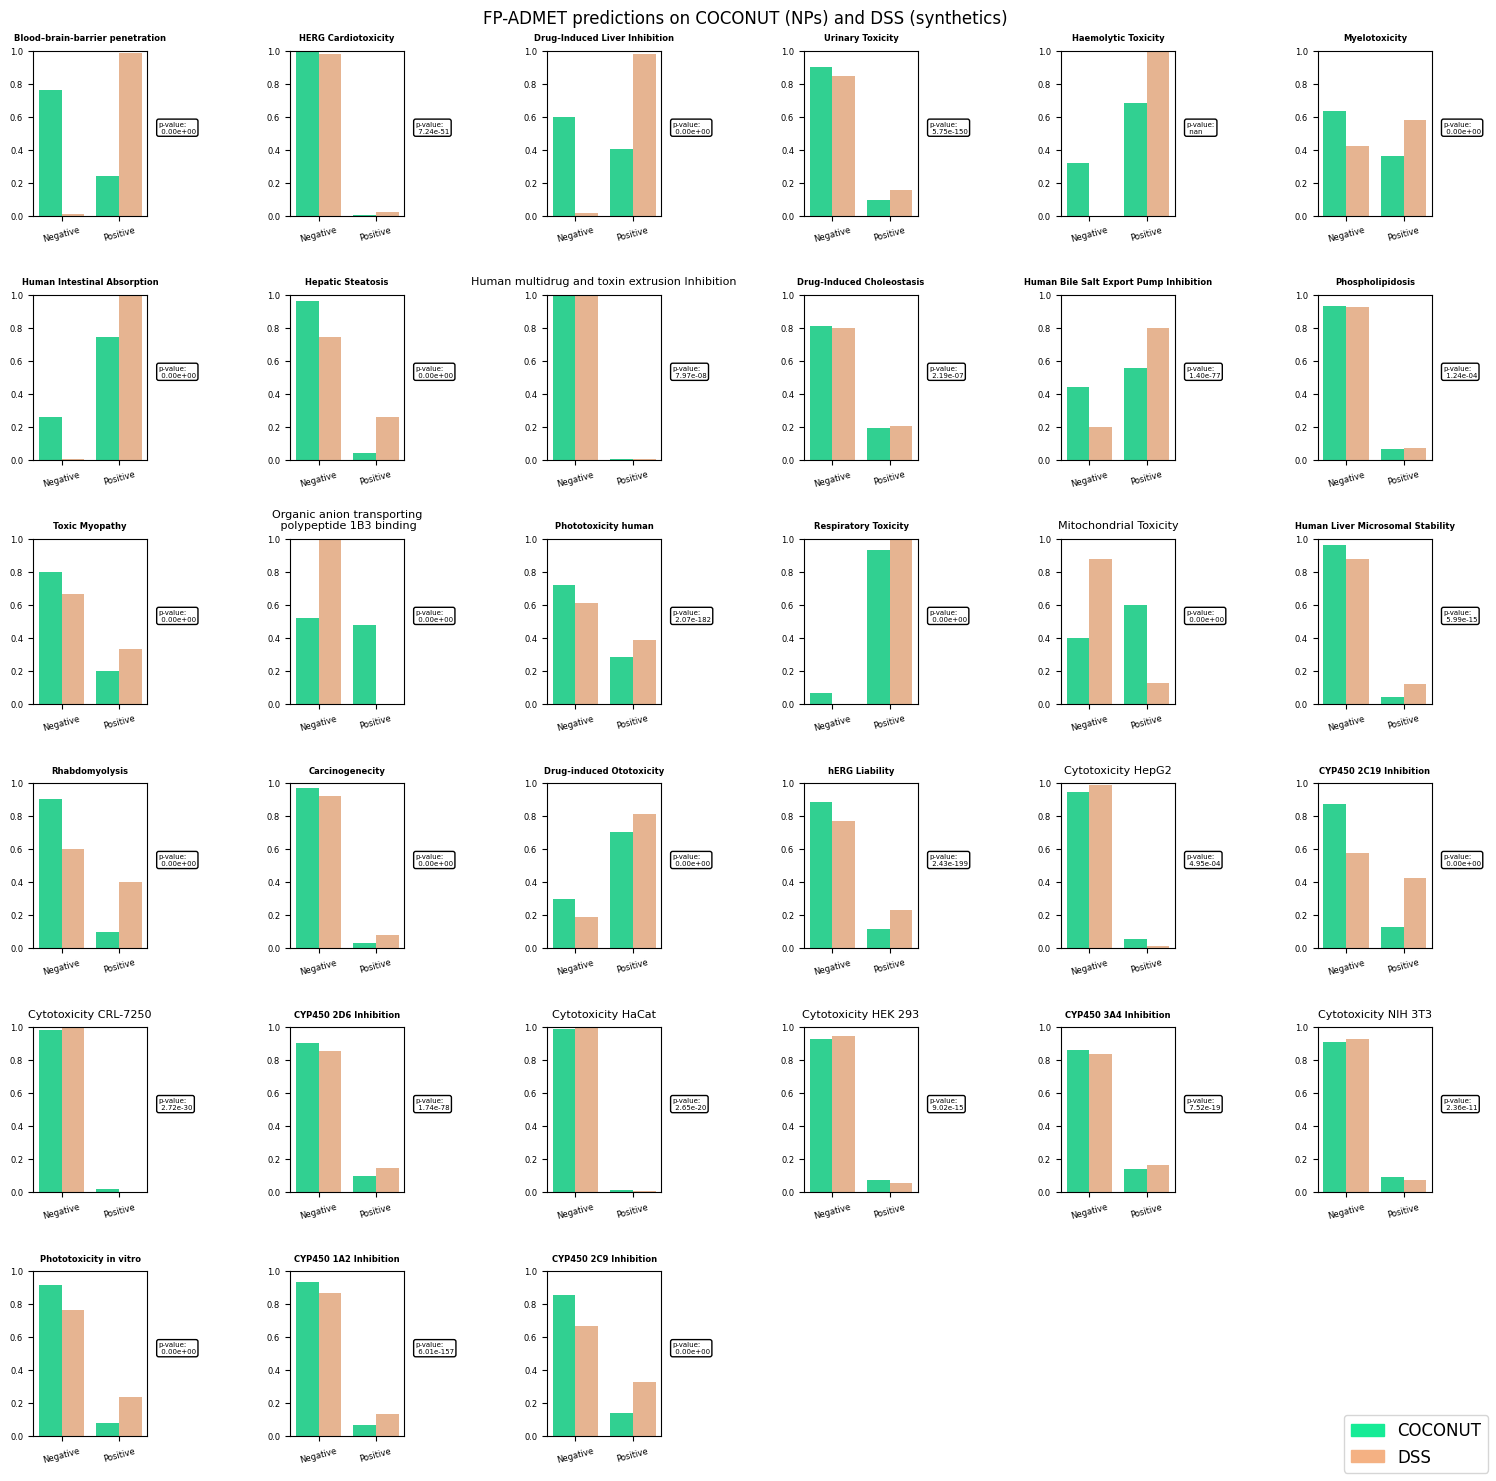

In [9]:
plt.rc("legend", fontsize=5, title_fontsize=5)
num_columns = 6
num_rows = 6

fig, axs = plt.subplots(num_rows, num_columns, figsize=(15, 15))
# Adjust the layout parameters to prevent overlap
plt.subplots_adjust(hspace=0.5, wspace=1.0)

converter_dictionary = {
    "N": "Negative",
    "P": "Positive",
    "Yes": "Positive",
    "No": "Negative",
    "Negative": "Negative",
    "Positive": "Positive",
    "negative": "Negative",
    "positive": "Positive",
    "no": "negative",
    "yes": "positive",
    "Carcinogen": "Positive",
    "NonCarcinogen": "Negative",
    "Inhibitor": "Positive",
    "NonInhibitor": "Negative",
    "Noninhibitor": "Negative",
    "Insoluble": "Negative",
    "Soluble": "Positive",
    "Active": "Positive",
    "Inactive": "Negative",
    "active": "Positive",
    "inactive": "Negative",
    "Blocker": "Positive",
    "NonBlocker": "Negative",
    "Stable": "Positive",
    "Unstable": "Negative",
    "Moderate": "Negative",
}
handles = []  # Collect legend handles
labels = []  # Collect legend labels

variable_count = 0
for i in range(num_rows):
    for j in range(num_columns):
        if variable_count >= len(usable_columns):
            axs[i, j].axis("off")
            continue

        current_column = usable_columns[variable_count]
        subset_coconut_data = coconut_data.dropna(subset=[current_column])
        subset_coconut_data[current_column] = (
            subset_coconut_data[current_column]
            .map(converter_dictionary)
            .fillna(subset_coconut_data[current_column])
        )
        coconut_subset = subset_coconut_data[current_column].value_counts(
            normalize=True
        )
        coconut_absolute_subset = subset_coconut_data[current_column].value_counts()

        subset_synthethic_data = synthethic_data.dropna(subset=[current_column])
        subset_synthethic_data[current_column] = (
            subset_synthethic_data[current_column]
            .map(converter_dictionary)
            .fillna(subset_synthethic_data[current_column])
        )

        synthetic_subset = subset_synthethic_data[current_column].value_counts(
            normalize=True
        )
        synthetic_absolute_subset = subset_synthethic_data[
            current_column
        ].value_counts()

        ax = axs[i, j]

        ax.tick_params(axis="both", labelsize=8)

        combined_subset = pd.concat(
            [coconut_subset, synthetic_subset], keys=["COCONUT", "DSS"], axis=1
        )
        dss_more_toxic = False
        if list(combined_subset.index) == ["negative", "positive"]:
            combined_subset.index = ["Negative", "Positive"]
        print(current_column, combined_subset.index)
        if (
            combined_subset.loc["Positive"]["DSS"]
            > combined_subset.loc["Positive"]["COCONUT"]
        ):
            dss_more_toxic = True

        combined_absolute_subset = pd.concat(
            [
                coconut_absolute_subset,
                synthetic_absolute_subset,
            ],
            keys=["COCONUT", "DSS"],
            axis=1,
        )

        chi2_results = chi2_contingency(combined_absolute_subset)
        combined_subset[current_column] = combined_subset.index
        combined_subset.sort_index(inplace=True)
        subset_melted = pd.melt(
            combined_subset,
            id_vars=current_column,
            var_name="Source",
            value_name="Percentage",
        )

        # Create a grouped barplot using Seaborn
        plot = sns.barplot(
            x=current_column,
            y="Percentage",
            hue="Source",
            data=subset_melted,
            palette=["#16EB96", "#F4B183"],
            ax=ax,
        )

        ax.tick_params(axis="both", labelsize=6)

        if dss_more_toxic == True:
            title_text = ax.text(
                0.5,
                1.05,
                current_column,
                ha="center",
                va="bottom",
                fontsize=6,
                fontweight="bold",
            )
        elif dss_more_toxic == False:
            title_text = ax.text(
                0.5, 1.05, current_column, ha="center", va="bottom", fontsize=8
            )

        ax.set_xlabel("")
        # Set y-axis between 0 and 100
        ax.set_ylim(0, 1)
        ax.annotate(
            "p-value:\n {:.2e}".format(chi2_results[1]),
            xy=(1.1, 0.5),
            xycoords="axes fraction",
            fontsize=5,
            bbox=dict(boxstyle="round", fc="w"),
        )

        # Rotate x-labels
        plt.setp(plot.get_xticklabels(), rotation=15)
        ax.set_ylabel("")
        # Remove individual legends for each subplot
        ax.get_legend().remove()
        variable_count += 1

# Convert hex colors to RGBA
coconut_color = to_rgba("#16EB96")
synthetic_color = to_rgba("#F4B183")

# Create Patch objects with individual colors
coconut_patch = mpatches.Patch(color=coconut_color, label="COCONUT")
synthetic_patch = mpatches.Patch(color=synthetic_color, label="DSS")

# Create handles list
handles = [coconut_patch, synthetic_patch]

plt.subplots_adjust(top=1.75, hspace=0.5, wspace=1.0)
# Add legend
fig.legend(handles, ["COCONUT", "DSS"], loc="lower right", prop={"size": 12})
plt.suptitle("FP-ADMET predictions on COCONUT (NPs) and DSS (synthetics)", fontsize=12)
plt.tight_layout()
plt.savefig("fpadmet_predictions.png", format="png", dpi=600)
plt.show()